## 1. Matplotlib

### Bar Plot

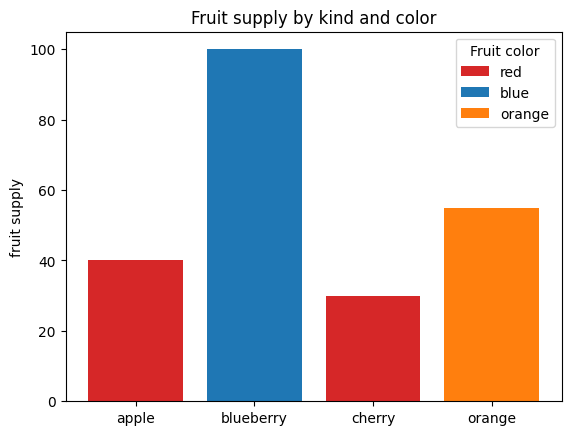

In [1]:
import matplotlib.pyplot as plt 

fig,ax=plt.subplots()

fruits=['apple','blueberry','cherry','orange']
counts=[40,100,30,55]
bar_labels=['red','blue','_red','orange']
bar_colors=['tab:red','tab:blue','tab:red','tab:orange']

ax.bar(x=fruits,height=counts,label=bar_labels,color=bar_colors)
ax.set_title("Fruit supply by kind and color")
ax.set_xlabel('')
ax.set_ylabel('fruit supply')
ax.legend(title='Fruit color')

plt.show()

### Histogram

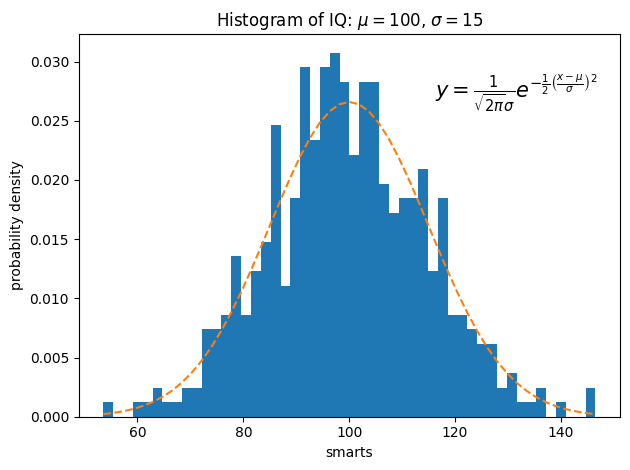

In [25]:
import numpy as np
np.random.seed(45)

# example data
mu=100
sigma=15
x=mu+sigma*np.random.randn(437) # distibution

num_bins=50

fig,ax=plt.subplots()

# The histogram of the data
n, bins, patches=ax.hist(x=x,bins=num_bins,density=True)

# add a best fit line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins,y,'--')

ax.set_xlabel("smarts")
ax.set_ylabel("probability density")
ax.set_title("Histogram of IQ: $\mu=100$, $\sigma=15$")

# Add text to the right upper side of the figure
text = r"$y = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$"
ax.text(0.96, 0.9, text, transform=ax.transAxes, ha='right', va='top',fontsize=15)

# tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### PiePlot

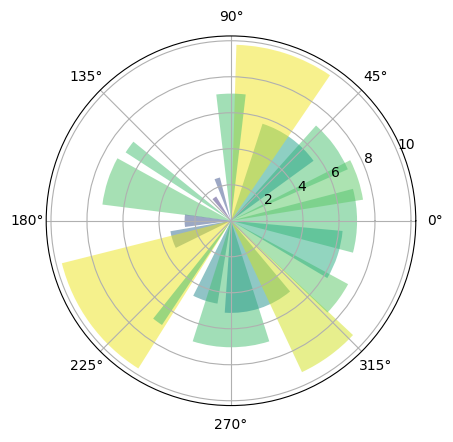

In [40]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

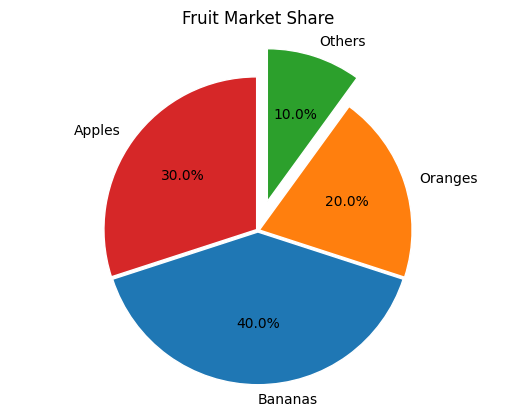

In [70]:
data=[30,40,20,10]
labels=["Apples","Bananas","Oranges","Others"]

# create the pie chart
colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']
explode = [0.01, 0.01, 0.01, 0.2]

plt.pie(x=data, 
        labels=labels, 
        autopct="%1.1f%%", 
        startangle=90, 
        colors=colors, 
        explode=explode, 
        wedgeprops={'edgecolor': 'white'})

plt.title("Fruit Market Share")
plt.axis("equal")
plt.show()

### Scatter plot

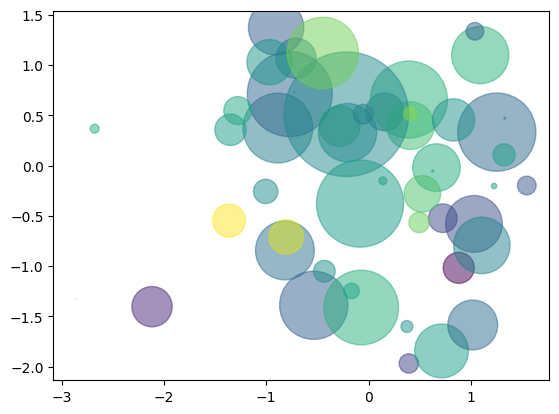

In [51]:
N=50
x=np.random.randn(N)
y=np.random.randn(N)
colors=np.random.randn(N)
area=(30*np.random.randn(N))**2

plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.show()

# 2. Seaborn

### Replot


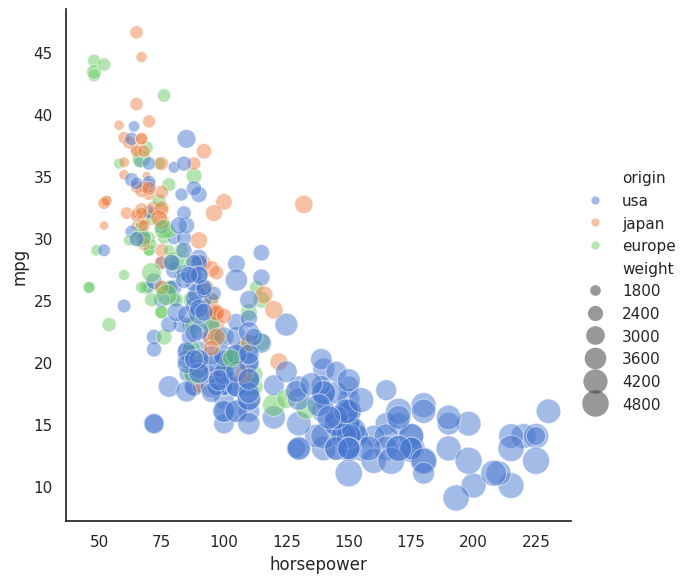

In [73]:
import seaborn as sns
sns.set_theme(style='white')

# Load the example mpg dataset
mpg=sns.load_dataset("mpg")

# Plot miles per gallon against hourse power with other semantics
sns.relplot(x="horsepower",y="mpg",hue="origin",size="weight",
           sizes=(40,400),
           alpha=0.5,
           palette="muted",
           height=6,
           data=mpg);


### Displot

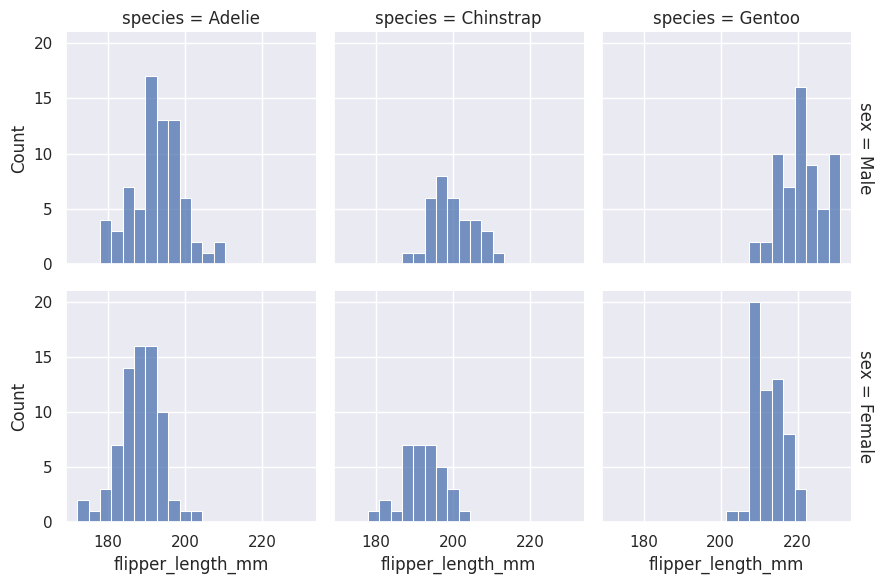

In [75]:
sns.set_theme(style='darkgrid')
df=sns.load_dataset("penguins")
sns.displot(data=df,x="flipper_length_mm",col="species",row="sex",binwidth=3,height=3,facet_kws=dict(margin_titles=True))

In [78]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Stripplot

In [79]:
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [80]:
planets["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

[Text(40.63888888888887, 0.5, '')]

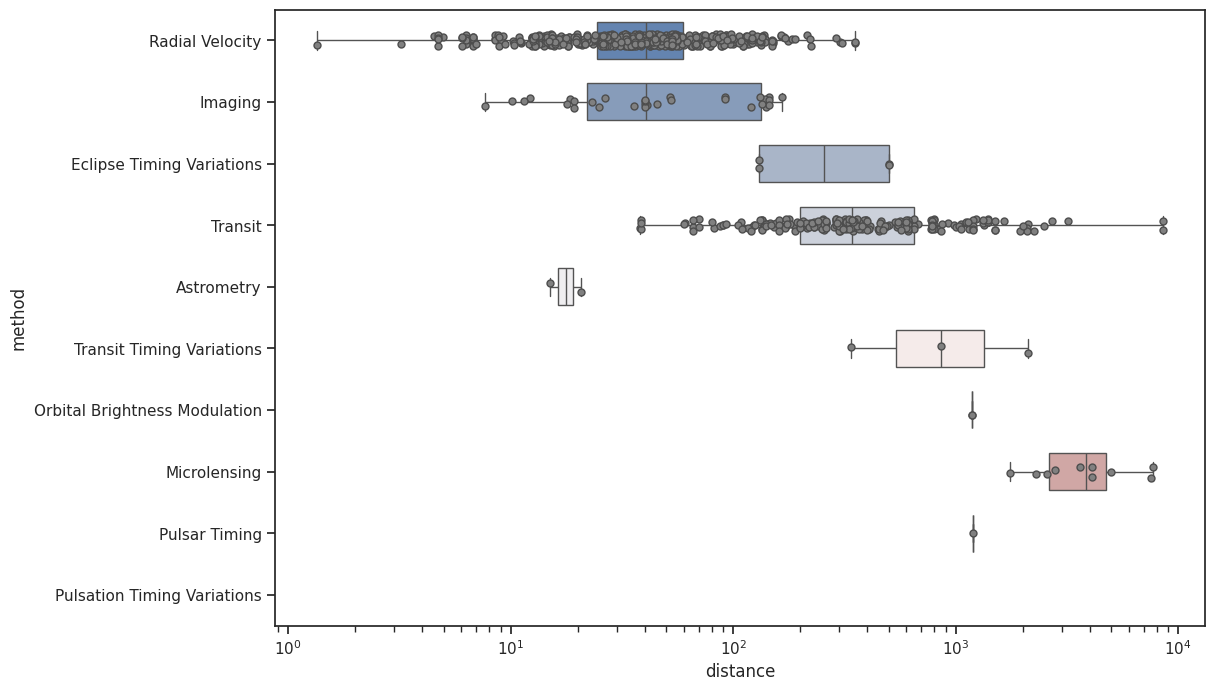

In [102]:
sns.set_theme(style='ticks')

# initialize the figure with a logarithmic xaxis
fig,axes=plt.subplots(figsize=(12,8))
axes.set_xscale('log')

# plot the orbital period with horizontal boxes
sns.boxplot(data=planets,y="method",x="distance",hue="method",whis=[0,100],width=0.6,palette="vlag",legend=False) # whis=[0,100]: whiskers of the box plot

# add in points to show each oberservation
sns.stripplot(data=planets,x="distance",y="method",size=5,color="0.5",linewidth=1)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")

### Heatplot

<AxesSubplot: >

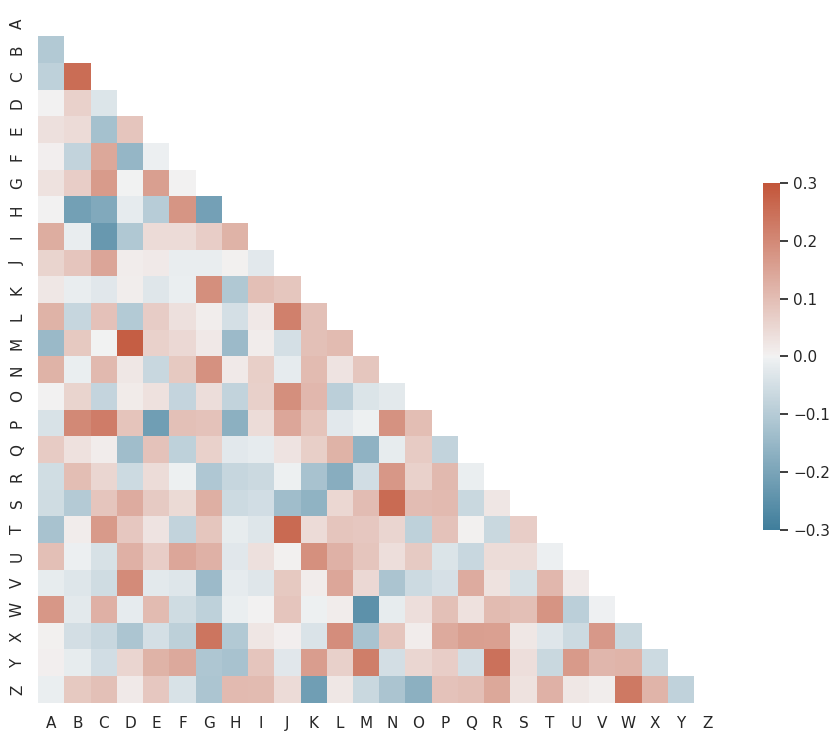

In [109]:
from string import ascii_letters
import numpy as np
import pandas as pd

sns.set_theme(style="white")

# Generate a large random dataset
rs=np.random.RandomState(33)
df=pd.DataFrame(data=rs.normal(size=(100,26)),columns=list(ascii_letters[26:]))

# compute the correlation matrix
corr=df.corr()

# Generate a mask for the upper triangle
mask=np.triu(corr)

# set up the matplotlib figure
fig,ax=plt.subplots(figsize=(11,9))

# Generate a custom diverging color map
cmap=sns.diverging_palette(230,20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=corr,mask=mask,annot=False,cmap=cmap,vmax=0.3,center=0,vmin=-0.3,cbar_kws={"shrink":0.5})

### KDE Plot

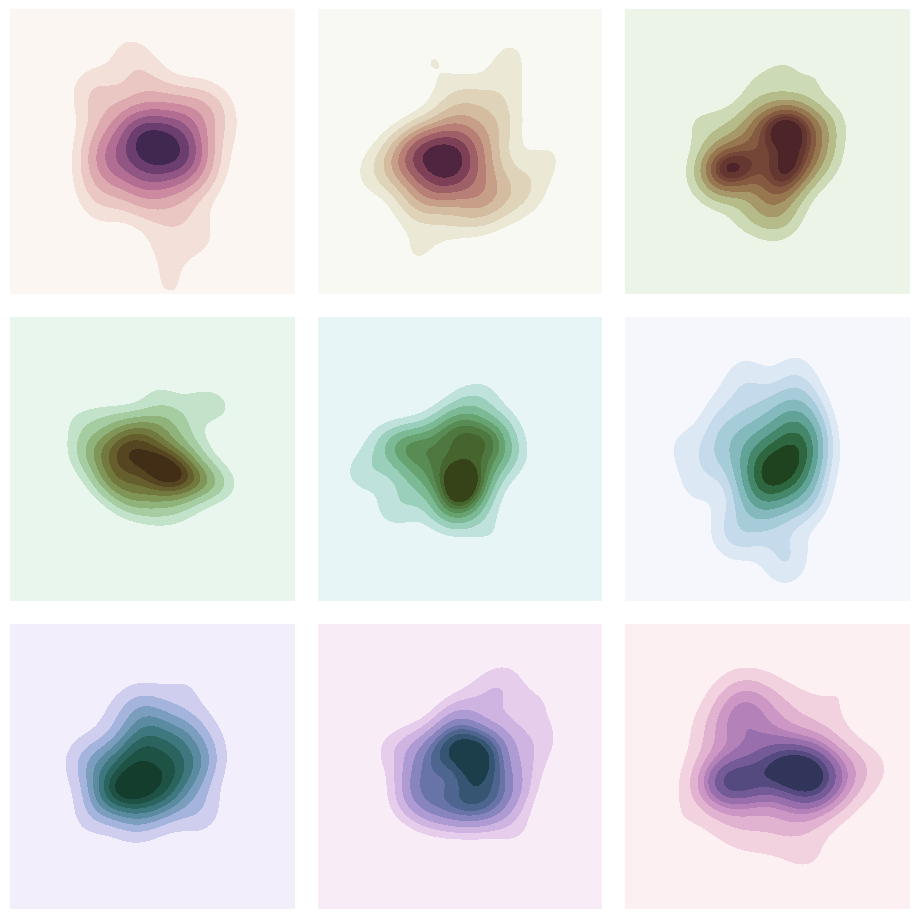

In [152]:
sns.set_theme(style="white")
rs=np.random.RandomState(50)

# set up the matplotlib figure
fig,axes=plt.subplots(3,3,figsize=(9,9),sharex=True,sharey=True) # all plots share same x,y axis ranges

# Rotate the starting point around the cubehelix hue circle
for ax,s in zip(axes.flat,np.linspace(0,3,10)):
    # create a cubehelix colormap to use with kdeplot
    cmap=sns.cubehelix_palette(start=s,light=1,as_cmap=True)
    # Generate and plot a random bivariate dataset
    x,y=rs.normal(size=(2,50))
    sns.kdeplot(x=x,y=y,cmap=cmap,fill=True,clip=(-5,5),cut=10,thresh=-0.01,levels=10,ax=ax) # clip: limit the plot to the visible range on x,y axis
    ax.set_axis_off()

ax.set(xlim=(-4,4),ylim=(-4,4))
fig.subplots_adjust(0,0,1,1,0.08,0.08) # tight layout, removes padding

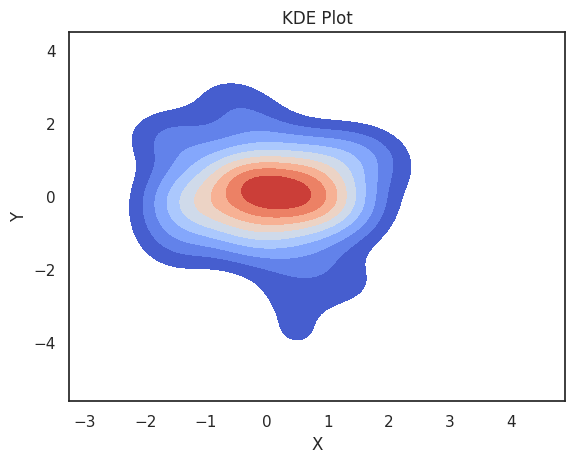

In [130]:
rs = np.random.RandomState(50)

# Generate random data
x, y = rs.normal(size=(2, 50))

# Create a KDE plot 
sns.kdeplot(x=x, y=y, fill=True, thresh=0.1, levels=10, cmap="coolwarm") 

# Adjust plot aesthetics if needed
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KDE Plot")
plt.show()


### Line Plot

<AxesSubplot: >

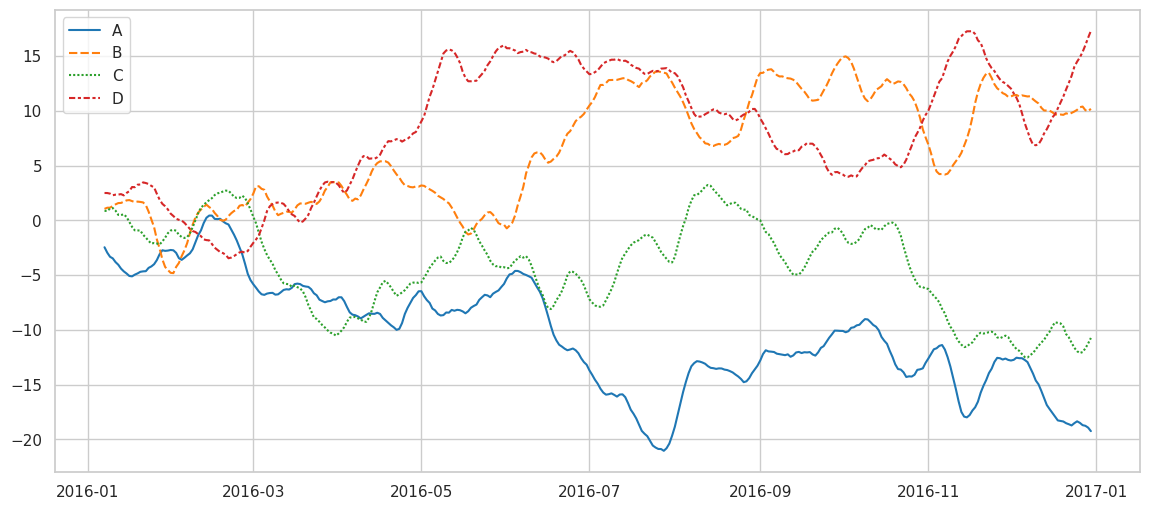

In [179]:
fig,ax=plt.subplots(figsize=(14,6))
sns.set_theme(style="whitegrid")
rs=np.random.RandomState(seed=365)
values=rs.randn(365,4).cumsum(axis=0)
dates=pd.date_range("1 1 2016",periods=365,freq="D")
data=pd.DataFrame(values,dates,columns=["A","B","C","D"])
data=data.rolling(7).mean()

sns.lineplot(data=data,palette="tab10",linewidth=1.5)

# 3. PlotNine

In [200]:
!pip install --upgrade plotnine -q

In [206]:
from plotnine import (
    ggplot,
    aes,
    geom_col,
    geom_text,
    position_dodge,
    lims,
    theme,
    element_text,
    element_blank,
    element_rect,
    element_line,
)
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

# (ggplot(df, aes(x='variable', y='value', fill='category'))
#  + geom_col())

In [198]:
import matplotlib

In [199]:
matplotlib.__version__

'3.6.0'

In [203]:
import plotnine
plotnine.__version__

'0.13.2'

In [204]:
!pip show plotnine

Name: plotnine
Version: 0.13.2
Summary: A Grammar of Graphics for Python
Home-page: 
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: The MIT License (MIT)
        
        Copyright (c) 2022 Hassan Kibirige
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMIT

In [205]:
!pip show matplotlib

Name: matplotlib
Version: 3.6.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: baycomp, catboost, fastai, orange-widget-base, Orange3, plotnine, pycaret, pyod, scikit-plot, seaborn, torch-lr-finder, wordcloud, yellowbrick


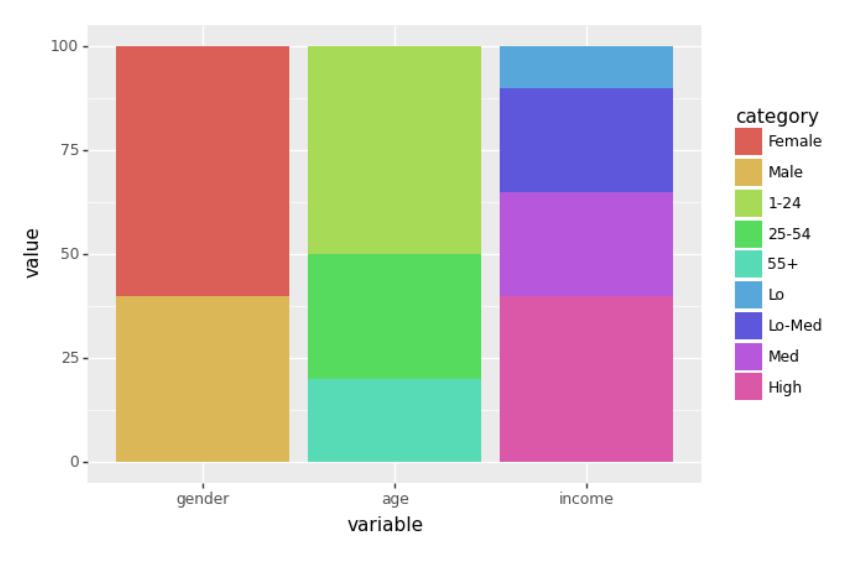

# 4. Bokeh

In [207]:
!pip install bokeh -q